Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
%matplotlib inline
sns.set(font_scale=0.8)
sns.set_style("ticks")

Load a raw dataset.


In [3]:
hogwarts_data = pd.read_csv("datasets/dataset_train.csv")

In [4]:
hogwarts_data.Birthday = pd.to_datetime(hogwarts_data.Birthday)

Define the function that calculate the quantile.


In [5]:
def get_quartile(column, q_quartile) -> float:
    # quartile position
    qu_p = q_quartile * .25 * (column.size - 1)
    # quartile index
    qu_i = int(qu_p)
    # quartile position fraction part
    qu_fract = qu_p - int(qu_i)
    quartile = column.iloc[qu_i] * (1 - qu_fract) + column.iloc[qu_i +
                                                                1] * qu_fract
    return quartile

Define describe function.


In [6]:
def describe(df):
    df = df.select_dtypes(include=['int64', 'float64'])
    describe_df = pd.DataFrame(
        index=["Count", "Mean", "Std", "Min", "25%", "50%", "75%", "Max"])
    for column_name in df:
        column = df[column_name][df[column_name].notna()].sort_values()
        mean = column.sum() / column.size
        std = np.sqrt(((column - mean)**2).sum() / (column.size - 1))
        describe_df[column_name] = [
            column.size, mean, std, column.iloc[0],
            get_quartile(column, 1),
            get_quartile(column, 2),
            get_quartile(column, 3), column.iloc[column.size - 1]
        ]
    return describe_df


describe(hogwarts_data)

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
Mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
Std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
Min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
Max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


Visualize histogram.


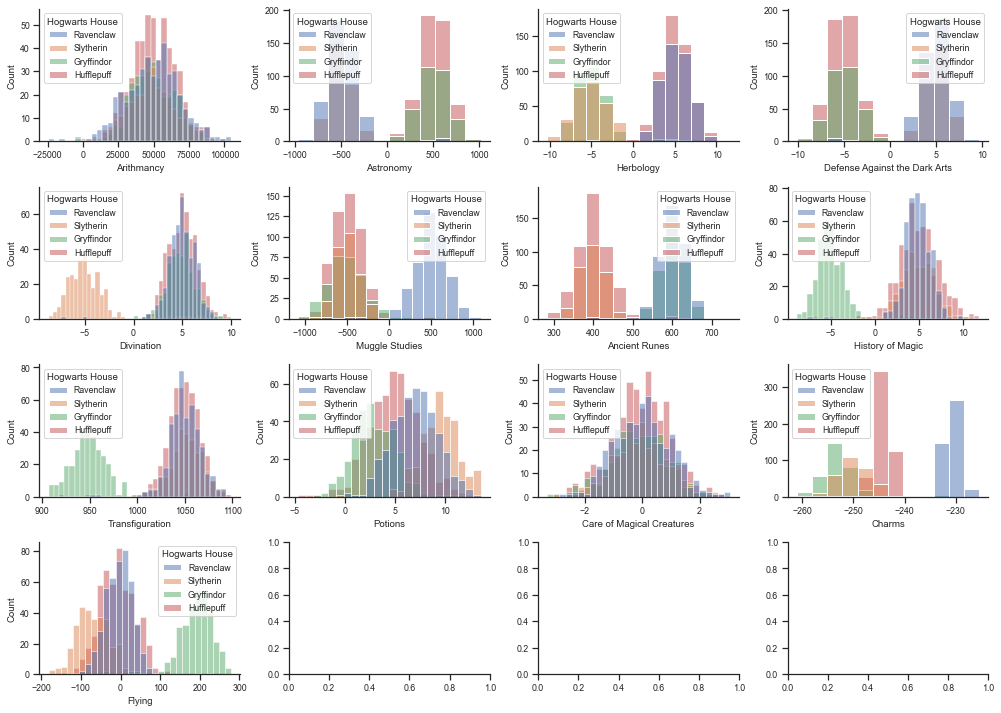

In [7]:
def histogram(df, ncols: int = 4, figsize=(14, 10)):
    df = df.drop(["First Name", "Last Name", "Birthday", "Best Hand", "Index"],
                 axis=1)
    fig, axs = plt.subplots(math.ceil(df.shape[1] / ncols),
                            ncols,
                            figsize=figsize)
    sns.despine()
    x = 0
    y = 0
    for column_name in df:
        if column_name == "Hogwarts House":
            continue
        p = sns.histplot(data=df,
                         x=column_name,
                         ax=axs[y, x],
                         hue="Hogwarts House")
        x += 1
        if x == ncols:
            x = 0
            y += 1
    plt.tight_layout()
    plt.show()


histogram(hogwarts_data)


Scatter plot.


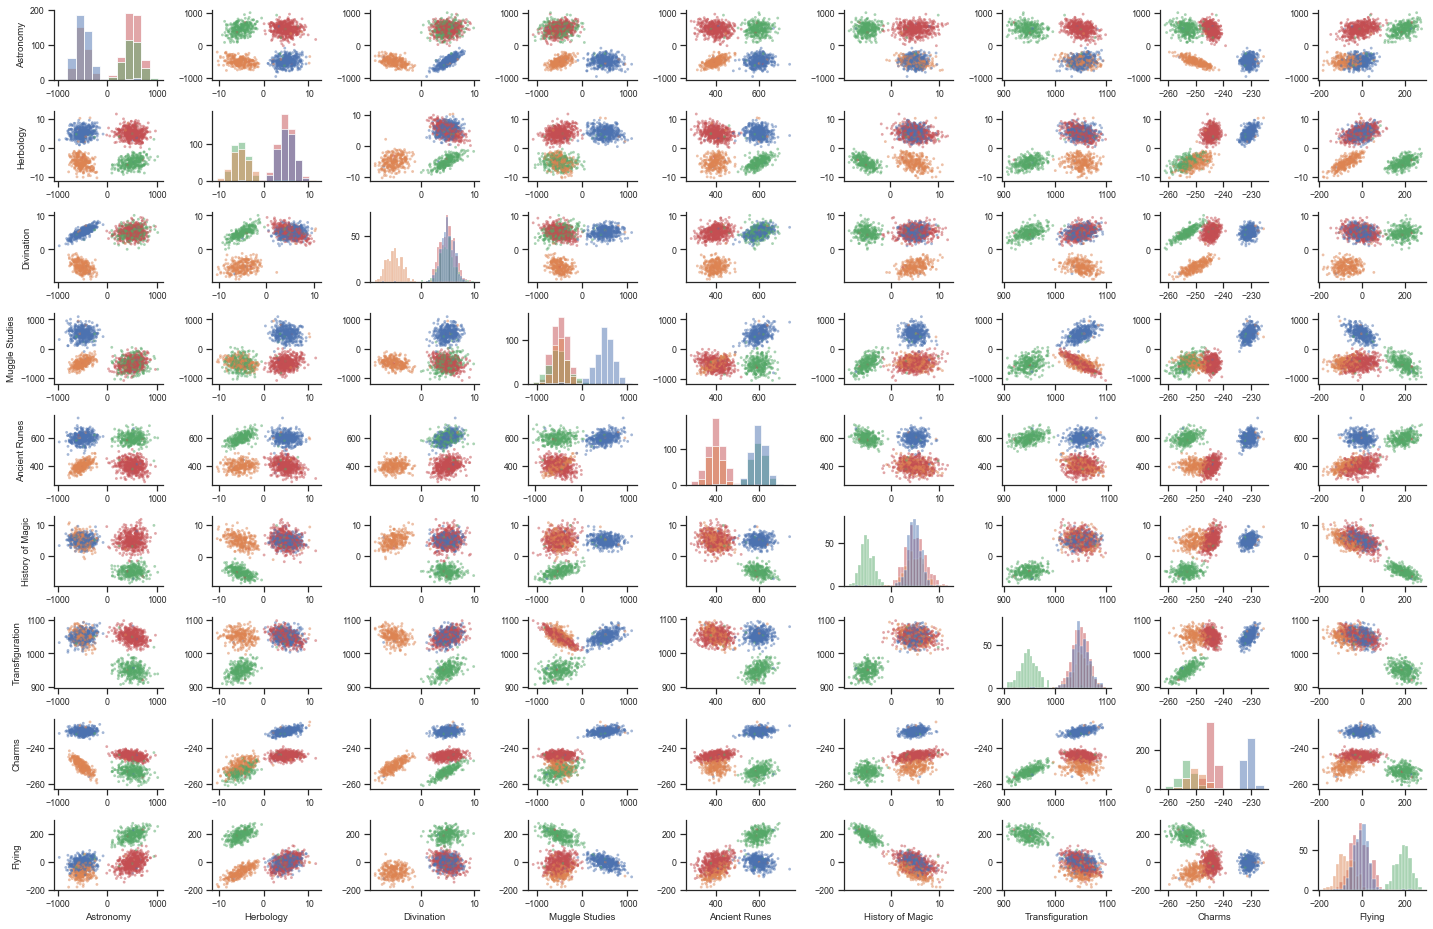

In [8]:
def show_pair_plot(df, show_all=False):
    if show_all == False:
        df = df.drop([
            "First Name", "Last Name", "Birthday", "Best Hand", "Index",
            "Arithmancy", "Defense Against the Dark Arts", "Potions",
            "Care of Magical Creatures"
        ],
                            axis=1)
    else:
        df = df.drop(
            ["First Name", "Last Name", "Birthday", "Best Hand", "Index"],
            axis=1)

    columns_len = df.shape[1]
    _, axs = plt.subplots(columns_len - 1,
                          columns_len - 1,
                          figsize=(17, 12))
    sns.despine()
    y = 0
    for column_y in df:
        x = 0
        if column_y == "Hogwarts House":
            continue
        for column_x in df:
            if column_x == "Hogwarts House":
                continue
            if (column_x == column_y):
                ax = sns.histplot(data=df,
                                  x=column_x,
                                  ax=axs[y, x],
                                  hue="Hogwarts House",
                                  legend=False)
            else:
                ax = sns.scatterplot(data=df,
                                     x=column_x,
                                     y=column_y,
                                     ax=axs[y, x],
                                     hue="Hogwarts House",
                                     legend=False,
                                     alpha=0.5,
                                     linewidth=0,
                                     s=8)

            ax.axes.xaxis.set_ticks([])
            ax.axes.yaxis.set_ticks([])
            if x != 0:
                ax.set(ylabel=None)
            else:
                ax.set(ylabel=column_y.replace(' ', '\n', 2))
            if y != columns_len - 2:
                ax.set(xlabel=None)
            else:
                ax.set(xlabel=column_x.replace(' ', '\n', 2))
            x += 1
        y += 1
    plt.tight_layout()
    plt.show()


show_pair_plot(hogwarts_data)